### Linear Regression with PyTorch's autograd

In this example, we will be using PyTorch's autograd to implement a simple linear regression model with one variable. The model will be in the form of y = w*x + b, where 'w' represents the weight, 'x' is the input, 'b' is the bias, and 'y' is the output. 

The autograd provides automatic differentiation for all operations on Tensors, which is particularly useful for implementing gradient descent. We will use this feature to optimize our loss function, which measures the difference between the model's predictions and the actual values. 

By iteratively adjusting the weight and bias in the direction that minimally increases the loss function (a process known as gradient descent), we will be able to find the optimal values for 'w' and 'b' that make our model as accurate as possible. 

Let's get started!

In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print(torch.__version__)

2.1.1+cu118


#### Make a dataset, which is just a set of points on a straight line

In [2]:
# Create an X tensor with 101 values ranging from -10 to 10
X = torch.linspace(-10, 10, 101)

# Create a y tensor according to the equation y = 2x + 1
y = 2 * X + 1

In [3]:
# Print the first 5 values of X and y
print(f'First 5 values of X: {X[:5]}, first 5 values of y: {y[:5]}')
print(f'Last 5 values of X: {X[-5:]}, last 5 values of y: {y[-5:]}')

First 5 values of X: tensor([-10.0000,  -9.8000,  -9.6000,  -9.4000,  -9.2000]), first 5 values of y: tensor([-19.0000, -18.6000, -18.2000, -17.8000, -17.4000])
Last 5 values of X: tensor([ 9.2000,  9.4000,  9.6000,  9.8000, 10.0000]), last 5 values of y: tensor([19.4000, 19.8000, 20.2000, 20.6000, 21.0000])


Text(0, 0.5, 'y')

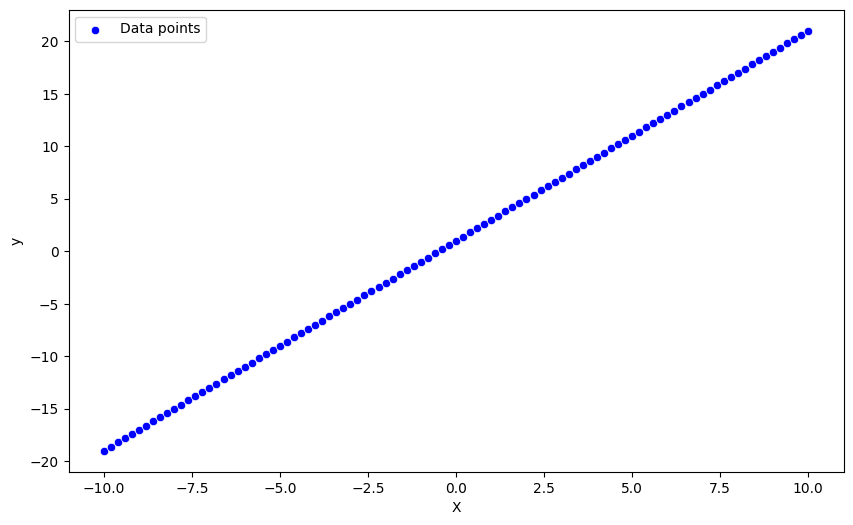

In [4]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')

In [5]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'y')

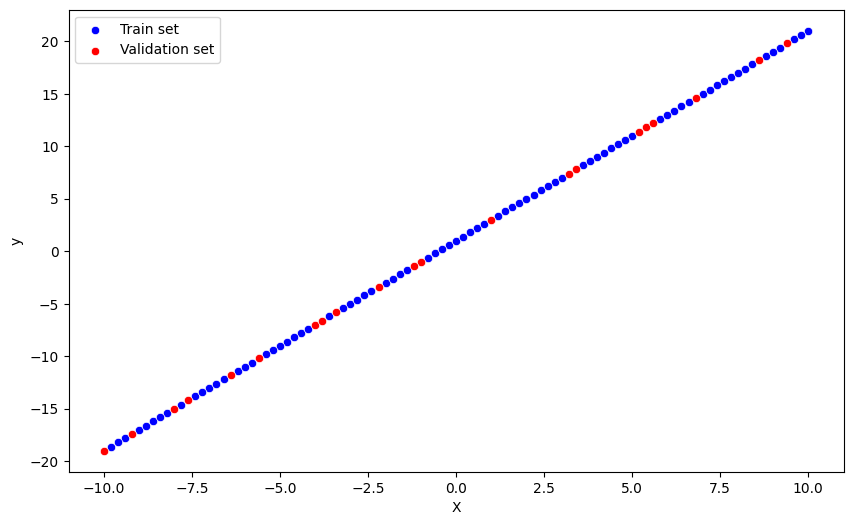

In [7]:
# Plot the train and test sets with different colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train, y=y_train, color='blue', label='Train set')
sns.scatterplot(x=X_val, y=y_val, color='red', label='Validation set')
plt.xlabel('X')
plt.ylabel('y')

### Define the model

In [8]:
class SimpleLinearRegression(torch.nn.Module):
    """
    In this class we implement the linear regression model, using PyTorch's autograd functionality.
    We inherit from the torch.nn.Module class, so that we can use the built-in PyTorch functionality
    for training the model.
    """
    
    def __init__(self):
        super().__init__()
        
        # Torch.nn.Parameter is a special kind of Tensor, that will get automatically registered as a model parameter
        # when assigned as an attribute to a Module. It also has a requires_grad attribute, that will be set to True
        # by default, so that the gradients will be computed for this parameter when doing back-propagation.
        self.weights = torch.nn.Parameter(torch.randn(1))
        self.bias = torch.nn.Parameter(torch.randn(1))
        
    def forward(self, x):
        """
        The forward pass of the model. Here we compute the output of the model given the input x.
        """
        return self.weights * x + self.bias

In PyTorch, the `torch.nn` module is used to create and train neural networks. It relies on `autograd` to define and compute gradients. Here are some of the key components of `torch.nn` that are essential for building a model:

1. **Module**: This is the base class for all neural network modules. Your models should also subclass this class.

2. **Parameters**: These are Tensor subclasses, that have a very special property when used with Module - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear in parameters() iterator.

3. **Functional**: Functions that don't have any parameters, such as `relu`, `sigmoid`, `softmax` etc. These are implemented in the `torch.nn.functional` module.

4. **Sequential**: A sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an ordered dict of modules can also be passed in.

5. **Loss Functions**: These are the functions that calculate a measure of how far the network's output is from the actual output. Examples include `nn.MSELoss` (Mean Squared Error) for regression tasks, and `nn.NLLLoss` (Negative Log Likelihood) for classification tasks.

6. **Optimizer**: This is what is used to update the parameters of the network based on the gradients computed during backpropagation. Examples include `SGD` (Stochastic Gradient Descent) and `Adam`.

In the context of our linear regression model, we will be using `nn.Module` to define our model, `nn.Parameter` to define our weights and bias, and `nn.MSELoss` as our loss function. We will also use an optimizer from `torch.optim` to perform the gradient descent.

In [9]:
# Create a random seed for reproducibility
torch.manual_seed(42)

In [10]:
# Create an instance of the model
# Note: when the model is initialized, the __init__() method is called, which initializes the weights and bias tensors
model = SimpleLinearRegression()

In [11]:
# List the parameters of the model
print(f'Parameters of the model: {list(model.parameters())}')

Parameters of the model: [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [12]:
# List the named parameters of the model
print(f'Named parameters of the model: {list(model.named_parameters())}')

Named parameters of the model: [('weights', Parameter containing:
tensor([0.3367], requires_grad=True)), ('bias', Parameter containing:
tensor([0.1288], requires_grad=True))]


In PyTorch, when you want to make a prediction or evaluate the model, you should use `torch.no_grad()` or `torch.inference_mode()`. These contexts are used to disable the gradient computation, which is not needed during model evaluation or prediction. 

1. **torch.no_grad()**: This context manager disables gradient calculation. It will reduce memory consumption for computations since the network won’t have to build a computational graph.

2. **torch.inference_mode()**: This is a new context manager in PyTorch 1.9.0 that offers more aggressive optimizations than `torch.no_grad()`. It will disable gradient computation but also perform other optimizations to improve inference speed.

Text(0, 0.5, 'y')

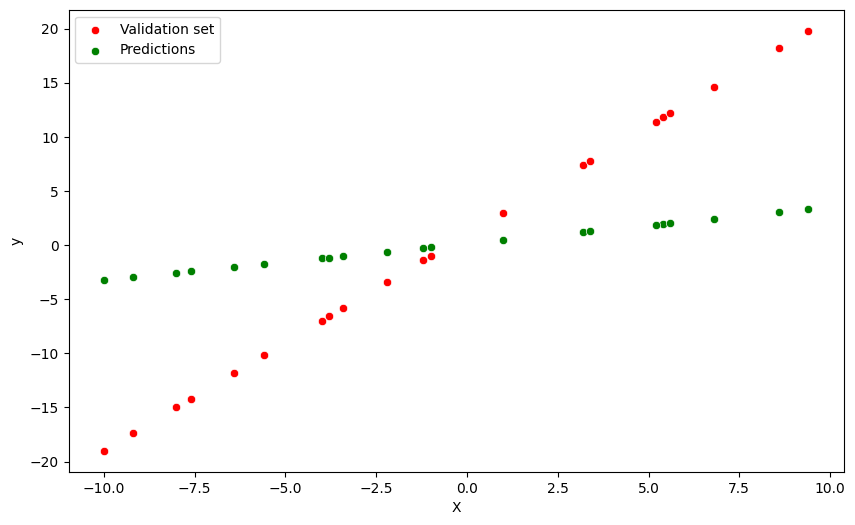

In [13]:
# Example of using torch.no_grad()
model.eval()  # set the model to evaluation mode
with torch.no_grad():
    prediction = model(X_val)
    
# Plot the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_val, y=y_val, color='red', label='Validation set')
sns.scatterplot(x=X_val, y=prediction, color='green', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')

Text(0, 0.5, 'y')

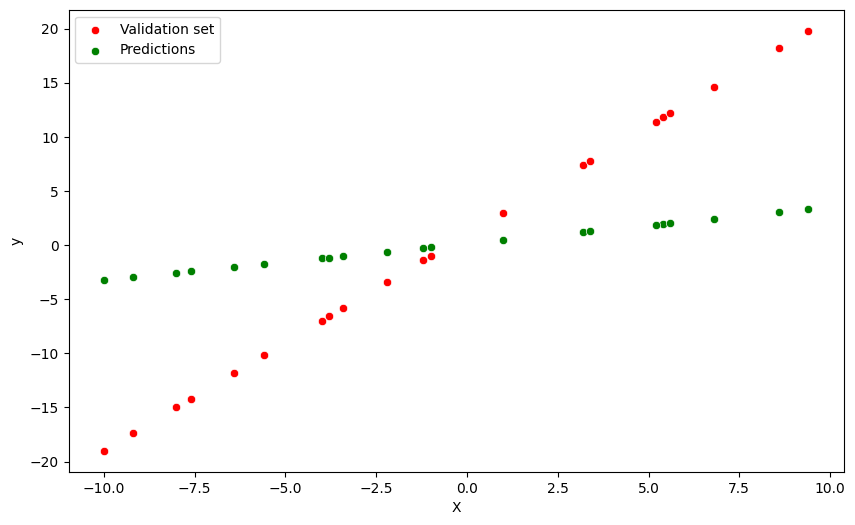

In [15]:
# Example of using torch.inference_mode()
model.eval()  # set the model to evaluation mode
with torch.inference_mode():
    prediction = model(X_val)
    
# Plot the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_val, y=y_val, color='red', label='Validation set')
sns.scatterplot(x=X_val, y=prediction, color='green', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')

Training a model in PyTorch generally involves the following steps:

1. **Define the Model**: Create a class that extends `nn.Module`. Inside the class, define the layers in the `__init__` method and the forward pass in the `forward` method. This step, we have already done above.

2. **Initialize the Model and Loss Function**: Instantiate the model class and define the loss function. The loss function is typically a pre-defined function from `torch.nn` such as `nn.MSELoss` for regression tasks or `nn.CrossEntropyLoss` for classification.

3. **Optimizer**: Choose an optimizer from the `torch.optim` module such as SGD or Adam. The optimizer is used to update the model parameters.

4. **Training Loop**: This is where the model parameters are iteratively updated to minimize the loss function. The general steps in a training loop are:
   - Forward pass: Compute the predicted outputs by passing inputs to the model (`output = model(input)`).
   - Compute loss: Calculate the loss function (`loss = loss_function(output, target)`).
   - Backward pass: Compute the gradient of the loss w.r.t. the model parameters (`loss.backward()`).
   - Update parameters: Update the model parameters using the optimizer (`optimizer.step()`).
   - Zero the gradients: Clear the gradients for the next iteration (`optimizer.zero_grad()`).

5. **Evaluation**: After the model is trained, it should be evaluated on a separate test dataset to check its performance. Remember to call `model.eval()` before evaluating to set the model to evaluation mode and `torch.inference_mode()` to disable gradient computation.

In [16]:
# Loss function for linear regression is the mean squared error (MSE)
loss_function = torch.nn.MSELoss()

In [17]:
# Optimizer for the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [18]:
# Define the number of epochs
n_epochs = 500

# Store the training loss and test loss for each epoch
train_losses = []
val_losses = []

# Train the model for n_epochs
for epoch in range(n_epochs):
    # Set the model to training mode
    model.train()
    
    # Compute the predictions
    # Note: when we call model(X_train), the forward() method of the model is called, which in turn calls the forward()
    prediction = model(X_train)
    
    # Compute the loss
    loss = loss_function(prediction, y_train)
    
    # Zero out the gradients from the previous iteration
    # We will explain this in more detail in the next section
    optimizer.zero_grad()
    
    # Compute the gradients
    loss.backward()
    
    # Update the parameters
    # The update of gradient descent is usually:
    # w = w - learning_rate * gradient_of_w
    # b = b - learning_rate * gradient_of_b
    # However, this is Adam optimizer, which is a bit more complicated
    optimizer.step()
    
    # Store the training loss
    # The item() method is used to extract a scalar from a tensor which only contains a single value
    train_losses.append(loss.item())
    
    # Set the model to evaluation mode
    model.eval()
    with torch.inference_mode():
        # In evaluation mode, we don't need to compute the gradients, so we use torch.inference_mode() to optimize the performance
        val_loss = loss_function(model(X_val), y_val)
        
        # Store the test loss
        val_losses.append(val_loss.item())
        
    # Print the loss every 20 epochs
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch 0, Train Loss: 94.1848, Validation Loss: 96.0920
Epoch 20, Train Loss: 72.8676, Validation Loss: 74.4761
Epoch 40, Train Loss: 55.0063, Validation Loss: 56.3611
Epoch 60, Train Loss: 40.6266, Validation Loss: 41.7482
Epoch 80, Train Loss: 29.3680, Validation Loss: 30.2712
Epoch 100, Train Loss: 20.7615, Validation Loss: 21.4645
Epoch 120, Train Loss: 14.3377, Validation Loss: 14.8647
Epoch 140, Train Loss: 9.6616, Validation Loss: 10.0412
Epoch 160, Train Loss: 6.3461, Validation Loss: 6.6085
Epoch 180, Train Loss: 4.0594, Validation Loss: 4.2334
Epoch 200, Train Loss: 2.5268, Validation Loss: 2.6376
Epoch 220, Train Loss: 1.5297, Validation Loss: 1.5974
Epoch 240, Train Loss: 0.9002, Validation Loss: 0.9401
Epoch 260, Train Loss: 0.5148, Validation Loss: 0.5374
Epoch 280, Train Loss: 0.2860, Validation Loss: 0.2984
Epoch 300, Train Loss: 0.1544, Validation Loss: 0.1609
Epoch 320, Train Loss: 0.0809, Validation Loss: 0.0842
Epoch 340, Train Loss: 0.0412, Validation Loss: 0.0428
E

Text(0, 0.5, 'Loss')

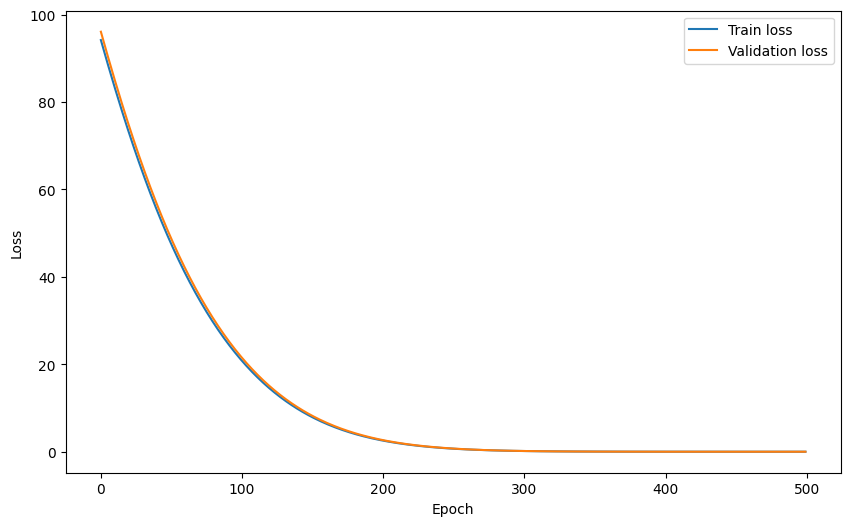

In [19]:
# Plot the training and test losses
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(n_epochs), y=train_losses, label='Train loss')
sns.lineplot(x=range(n_epochs), y=val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'y')

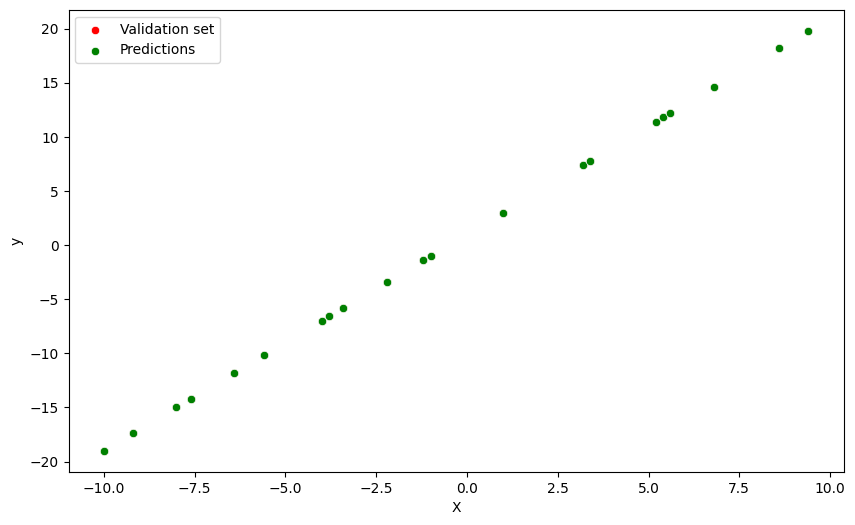

In [21]:
# Make predictions on the test set
model.eval()
with torch.inference_mode():
    predictions = model(X_val)

# Plot the predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_val, y=y_val, color='red', label='Validation set')
sns.scatterplot(x=X_val, y=predictions, color='green', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')